In [1]:
%config Completer.use_jedi = False
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from matplotlib import font_manager, rc
path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [2]:
import cv2

In [3]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import copy

In [4]:
# shoesimage = ImageDataGenerator(rescale=1/255.0)
shoesimage = ImageDataGenerator()

In [5]:
gen_image=shoesimage.flow_from_directory(directory="/home/godeung/Data/dataset_shoes/Boots_class/",target_size=(98,98),color_mode='grayscale',batch_size=10000)

Found 12781 images belonging to 3 classes.


In [6]:
for i,image in enumerate(gen_image):
    if i==1:
        break
    batch_data=image

In [7]:
print(batch_data[0].shape)
print(batch_data[1].shape)

(10000, 98, 98, 1)
(10000, 3)


In [8]:
data=copy.copy(batch_data[0]) # image_batch 

In [9]:
np.argmax(batch_data[1][0]) #batch_data[1][i] 

2

In [10]:
flatten = data.reshape((10000,np.prod(data[0].shape)))

In [11]:
flatten.shape

(10000, 9604)

In [12]:
from sklearn.manifold import TSNE


In [13]:
tsne = TSNE(n_components=3)

# TSNE에는 transform 메서드가 없으므로 대신 fit_transform 사용
digits_tsne = tsne.fit_transform(flatten)

In [14]:
digits_tsne.shape

(10000, 3)

In [ ]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(digits_tsne[:,0].min(), digits_tsne[:,0].max())
ax.set_ylim3d(digits_tsne[:,1].min(), digits_tsne[:,1].max())
ax.set_zlim3d(digits_tsne[:,2].min(), digits_tsne[:,2].max())


for i in range(100):
    # 숫자 텍스트를 이용해 산점도 그리기
    ax.text(digits_tsne[i, 0], digits_tsne[i, 1],digits_tsne[i, 2], str(np.argmax(batch_data[1][i])),
             color = colors[np.argmax(batch_data[1][i])], fontdict={'weight':'bold', 'size':9})
    
ax.set_xlabel('t-SNE 특성 0')
ax.set_ylabel('t-SNE 특성 1')
ax.set_zlabel('t-SNE 특성 2')
plt.show()

In [ ]:
digits_tsne[0]

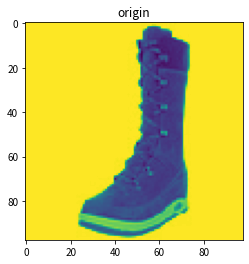

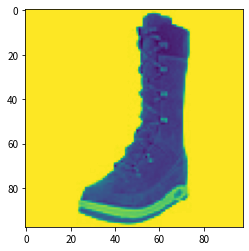

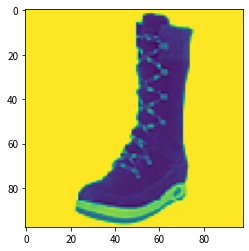

In [37]:
index = 555
x=digits_tsne[index][0]
y=digits_tsne[index][1]
z=digits_tsne[index][2]
plt.imshow(batch_data[0][index])
plt.title("origin")
plt.show()

scale = 0.5

for j,i in enumerate(digits_tsne):
    requirement = (i[0]>x-scale and i[0]<x+scale) and (i[1]>y-scale and i[1]<y+scale) and (i[2]>z-scale and i[2]<z+scale)
    if requirement:
        plt.imshow(batch_data[0][j])
        plt.show()

# PCA 로 해보자

In [ ]:
shoesimage = ImageDataGenerator()
gen_image=shoesimage.flow_from_directory(directory="./Boots_class/"
                                         ,target_size=(64,64)
                                         ,color_mode='grayscale'
                                         ,batch_size=10000)
batch_data = []
for i,image in enumerate(gen_image):
    if i == 2:
        break
    batch_data.append(image)
dt=batch_data[0][0]
flatten = []
for i in dt[...,0]:
    flatten.append(i.flatten())
flatten = np.array(flatten)

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=100, random_state=0,max_iter=1000) # 랜덤 시드를 0으로 설정
nmf.fit(flatten)
X_train_nmf = nmf.transform(flatten)
# X_test_nmf = nmf.transform(flatten)

fig, axes = plt.subplots(20, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape((64,64)))
    ax.set_title("성분 {}".format(i))

[https://towardsdatascience.com/k-means-and-pca-for-image-clustering-a-visual-analysis-8e10d4abba40]

In [ ]:
print("Dimension of our data after PCA = " + str(X_train_nmf.shape))

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(init="k-means++",n_clusters = 3, n_init = 100)
k_means.fit(X_train_nmf)

In [ ]:
k_means.labels_

In [ ]:
G = len(np.unique(k_means.labels_)) # Number of labels
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for i in range(G)]
for i, label in enumerate(k_means.labels_,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue
#Visualisation for clusters = clust
plt.figure(figsize=(20,20))
clust = 3 #enter label number to visualise
num = 100 #num of data to visualize from the cluster
for i in range(1,num): 
    plt.subplot(10, 10, i); #(Number of rows, Number of column per row, item number)
    plt.imshow(flatten[cluster_index[clust][i]].reshape(64,64), cmap = plt.cm.binary)
    
plt.show()